In [6]:
import os
os.chdir('..')
os.chdir('..')
print(os.getcwd())
import rsnapsim as rss
import numpy as np
os.chdir('rsnapsim')
os.chdir('interactive_notebooks')
import matplotlib.pyplot as plt

poi_strs, poi_objs, tagged_pois,raw_seq = rss.seqmanip.open_seq_file('../gene_files/H2B_withTags.txt')
H2B_obj = tagged_pois['1'][0]

rss.solver.protein = H2B_obj #pass the protein object
t = np.linspace(0,30,31)
solution = rss.solver.solve_ssa(H2B_obj.kelong, t, ki=.033, kt = 10, low_memory=False,record_stats=True)

C:\Users\willi\Documents\GitHub\rSNAPsim


In [7]:
plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 120
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['font.size'] = 15
plt.rcParams['axes.grid'] = False

In [14]:
t = np.linspace(0,30,31)
solution = rss.solver.solve_ssa(H2B_obj.kelong, t, ki=.033, kt = 10, low_memory=False,record_stats=True)

In [17]:
solution.intensity_vec.shape

(1, 31, 100)

Text(0, 0.5, 'Intensity (epitopes)')

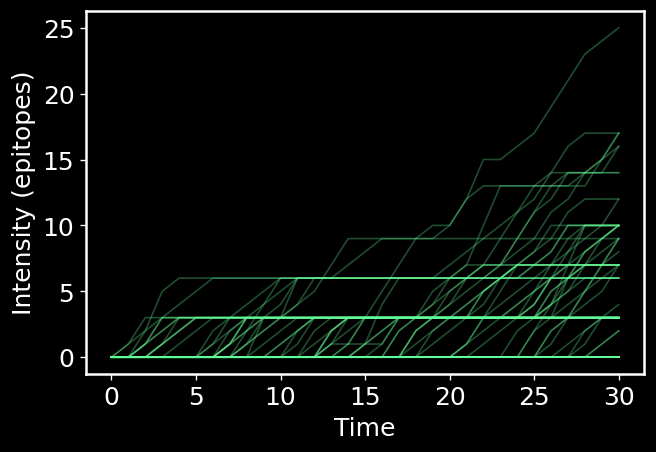

In [18]:
import matplotlib.pyplot as plt
plt.plot(solution.intensity_vec[0,:,:],color='#66FF99',alpha=.3 );
plt.xlabel('Time')
plt.ylabel('Intensity (epitopes)')


In [ ]:
plt.plot(solution.rib_density,'')
plt.xlabel('Codon Position')
plt.ylabel('Probability')



def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

plt.plot(moving_average(solution.rib_density,10),'')
plt.xlabel('Codon Position')
plt.ylabel('Probability')


In [ ]:
plt.plot(solution.rib_per_t[:,0])
plt.xlabel('Time')
plt.ylabel('Ribosomes on mRNA')
plt.title('Ribosomes on mRNA per time for 1 traj')

In [ ]:
for i in range(0,len(solution.col_points)):
     plt.scatter(solution.col_points[i][:,0], solution.col_points[i][:,1])
        
plt.xlabel('Codon Position')
plt.ylabel('Collision Time')
plt.title('Collisions recorded (each color is one trajectory)')

In [ ]:
plt.hist(np.hstack([ x[:,0] for x in solution.col_points]), bins=400, density=False );
plt.plot(moving_average(solution.rib_density,10),'')

        
plt.xlabel('Codon Position')
plt.ylabel('Probability')
plt.title('Collisions compared with ribosome density')
plt.legend(['Ribosome Density','Collision Count Density'])